# Loading and plotting two example data files from the the May-Sep 2022 ApRES deployment

This NB is for learning how to use the ApRES processing and plotting scripts [here](https://github.com/ldeo-glaciology/phase-sensitive-radar-processing/tree/main/code/ApRES_Python_Nicholls_2021).

I copied two .DAT files from the full May-Sep 22 Greenland ApRES dataset to do some initial plotting. 

These are stored /Users/jkingslake/Documents/data/ApRES_greenland/two_examples/

They are from the start and the end of the deployment from one of the three ApRES sites. I don't know which one (this NB just for learning how to use the code). 

The names of the two data files are:

In [1]:
d1 = "DATA2022-05-26-1536.DAT"
d2 = "DATA2022-09-22-2220.DAT"

They are both stored in:

In [2]:
folder = "/Users/jkingslake/Documents/data/ApRES_greenland/two_examples/"

Add the code to the path (it was previously cloned from the repo linked to above)


In [3]:
import sys
sys.path.append("/Users/jkingslake/Documents/science/ApRES/phase-sensitive-radar-processing/code/ApRES_Python_Nicholls_2021")

Import the ApRES modules as well as Pandas, numpy and matplotlib.

In [50]:
import ApRESDefs
import importlib
importlib.reload(ApRESDefs) 
import ApRES_plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

`ApRESDefs.DataFileObject` searches through each .DAT file and notes where the part of the file that corresponds to each burst starts. It also calculates how many bursts there. 

In [5]:
fileDescriptor1 = ApRESDefs.DataFileObject(folder + d1)

`ApRESDefs.DataFileObject`'s, like fileDescriptor1, have properties like the filename of the .DAT file, the number of bursts in the file, and the locations in the file of the start of each burst (locations are caclculated in terms of the UTF-8 encoded version of the file).

In [6]:
print(f"The .DAT file is at {fileDescriptor1.Filename}")
print(f"There are {fileDescriptor1.NoBurstsInFile} bursts in this file")
print(f"The location of the start of the first burst in this file is {fileDescriptor1.BurstLocationList[0]}")
print(f"The location of the start of the last burst in this file is {fileDescriptor1.BurstLocationList[-1]}")

The .DAT file is at /Users/jkingslake/Documents/data/ApRES_greenland/two_examples/DATA2022-05-26-1536.DAT
There are 94 bursts in this file
The location of the start of the first burst in this file is 2
The location of the start of the last burst in this file is 297734052


`ApRESDefs.DataFileObject`'s also have a method called ExtractBurst, which extracts individual bursts into `BurstObject`'s.

## Load one burst

In [7]:
Burst_1_0 = fileDescriptor1.ExtractBurst(0)  # The numbering in the name of burst denotes that Burst object is from .DAT file 1 and burst 0.

In [8]:
Chirp = Burst_1_0.ExtractChirp([0])

`BurstObject`'s have properties including the burst number in the .DAT file and the filename (which is the same as `fileDescriptor1.Filename':

In [9]:
print(f"The .DAT file is at {Burst_1_0.Filename}.")
print(f"This is burst number {Burst_1_0.BurstNo} in this file.")


The .DAT file is at /Users/jkingslake/Documents/data/ApRES_greenland/two_examples/DATA2022-05-26-1536.DAT.
This is burst number 0 in this file.


Another property of the `BurstObject` is the header. This contains lots of information about the measurements, including the time stamp of the start of the burst. the frequency range of the chirps, the attenuator and gain settings (set by the user during deployment), the battery voltage, and the repeat time of measurements (set by the user during deployment). 

In [10]:
print(f"The Burst started at {Burst_1_0.Header['Time stamp']}.")
print(f"In this burst, {Burst_1_0.Header['nAttenuators']} pairs of gain and attenuator settings were used.\
 There are {Burst_1_0.Header['NChirps']} chirps in total, separated into {Burst_1_0.Header['NSubBursts']} subbursts")
print(f"The upper frequency of the chirps was {Burst_1_0.Header['StopFreq']}.")
print(f"The lower frequency of the chirps was {Burst_1_0.Header['StartFreq']}.")
print(f"The system samples the return {Burst_1_0.Header['N_ADC_SAMPLES']} times in each chirp,")
print(f"so between each sample the transmitted frequency increases by {(Burst_1_0.Header['StopFreq'] - Burst_1_0.Header['StartFreq'])/(Burst_1_0.Header['N_ADC_SAMPLES']-1)} Hz.")
print(f"Note that this frequncy step is also stored in the header: {Burst_1_0.Header['FreqStepUp']} Hz (i.e. you dont need to calculate it from the frequency range and the number of samples).")
print(f"We know that each chirp takes 1 second, so the time delay between each sample is {1/(Burst_1_0.Header['N_ADC_SAMPLES']-1)} s.")
print(f"This time delay is also staored in the header {Burst_1_0.Header['dt']} second (i.e. you dont need to calculate it from the number of samples and the 1-second length of each chirp).")

The Burst started at 2022-05-26 15:37:02.
In this burst, 2 pairs of gain and attenuator settings were used.There are 40 chirps in total, separated into 20 subbursts
The upper frequency of the chirps was 400000000.
The lower frequency of the chirps was 200000000.
The system samples the return 40001 times in each chirp,
so between each sample the transmitted frequency increases by 5000.0 Hz.
Note that this frequncy step is also stored in the header: 5000 Hz (i.e. you dont need to calculate it from the frequency range and the number of samples).
We know that each chirp takes 1 second, so the time delay between each sample is 2.5e-05 s.
This time delay is also staored in the header 2.5e-05 second (i.e. you dont need to calculate it from the number of samples and the 1-second length of each chirp).


In [11]:
print(f"The header also stores the attenuator settings used for each chirp, for example, the 40 AFGain settings were: {Burst_1_0.Header['AFGain_allChirps']}")

The header also stores the attenuator settings used for each chirp, for example, the 40 AFGain settings were: [-4, -14, -4, -14, -4, -14, -4, -14, -4, -14, -4, -14, -4, -14, -4, -14, -4, -14, -4, -14, -4, -14, -4, -14, -4, -14, -4, -14, -4, -14, -4, -14, -4, -14, -4, -14, -4, -14, -4, -14]


Also stored as properties in the `BurstObject`'s is the voltage return from all the chirps in the burst all contananated together.

In [12]:
Burst_1_0.v

array([ 0.24803162,  0.1770401 , -0.14507294, ...,  0.05496979,
        0.04016876, -0.28102875])

## Plot all the chrips in a burst

To plot all the chirps against time, we need an array of time values corresponding to when each part of each deramped chirp was records. A quick and dirty way of doing this is use the time between samples and the length of the array `Burst_1_0.v`:

In [13]:
t = np.array(range(len(Burst_1_0.v))) * Burst_1_0.Header["dt"]

This ignores any small intervals between the end of one chirp and the begining of another. Then we can plot all the chirps as follows

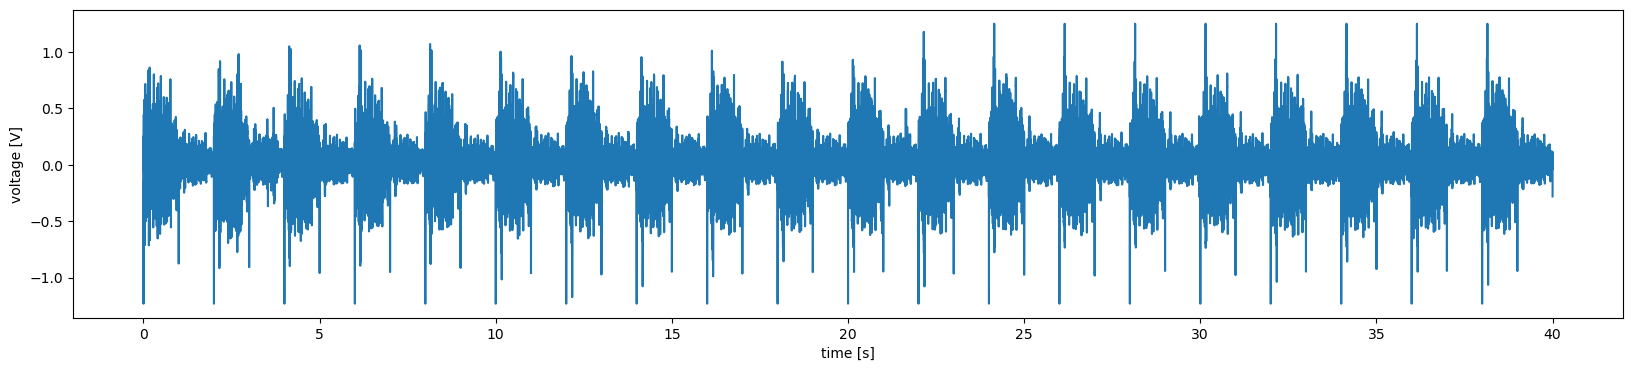

In [14]:
fig, ax = plt.subplots(figsize=(20, 4))
ax.plot(t, Burst_1_0.v, label='all chirps') 
ax.set_xlabel('time [s]')
ax.set_ylabel('voltage [V]');

We can see the affect of the two attenuator setting-pairs used. The chirps from different setting-pairs are interleaved, so the 1st second contains a 1-sec chirp with high amplitude, the 2nd second contains a chirp with low amplitude, the 3rd second contains another high amplitude chirp, and so on. 

## Extract and plot just one chirp
`BurstObject`s have a method called ExtractChirp which extracts individual chirps or averages over multiple chirps. 


### Extract the chirp
To extract a single chirp the input to the method needs to be a list containing just the chirp number you want, e.g., 

In [162]:
Chirp_1_0_0 = Burst_1_0.ExtractChirp([1])   # the numbering system I have used here extends the burst numbering system above.

This makes a `ChirpObject`. It has a header that is based on the burst header, but with some additional entries specific to this chirp.

In [163]:
print(f"This chirp has a gain setting of {Chirp_1_0_0.Header['AFGain_thisChirp'][0]}")
print(f"This chirp has an attenuator setting of {Chirp_1_0_0.Header['Attenuator1_thisChirp'][0]}")

This chirp has a gain setting of -14
This chirp has an attenuator setting of 5.0


To average over (i.e. stack) the chirps, you supply a list of all the chirp numbers, e.g., 

In [158]:
Chirp_stacked = Burst_1_0.ExtractChirp(list(np.arange(Burst_1_0.Header['NChirps'])))

/Users/jkingslake/Documents/science/ApRES/phase-sensitive-radar-processing/code/ApRES_Python_Nicholls_2021/ApRESDefs.py:244: UserWarning: This is stacking over chirps with different attenuator settings.
  warnings.warn('This is stacking over chirps with different attenuator settings.')


it gives you a warning that you are avergaing over chirps that were collectied using different attenuatir settings. 

In [166]:
%pprint
print(Chirp_stacked.Header['AFGain_thisChirp'])
%pprint

Pretty printing has been turned OFF
[-4, -14, -4, -14, -4, -14, -4, -14, -4, -14, -4, -14, -4, -14, -4, -14, -4, -14, -4, -14, -4, -14, -4, -14, -4, -14, -4, -14, -4, -14, -4, -14, -4, -14, -4, -14, -4, -14, -4, -14]
Pretty printing has been turned ON


### Plot the chirp


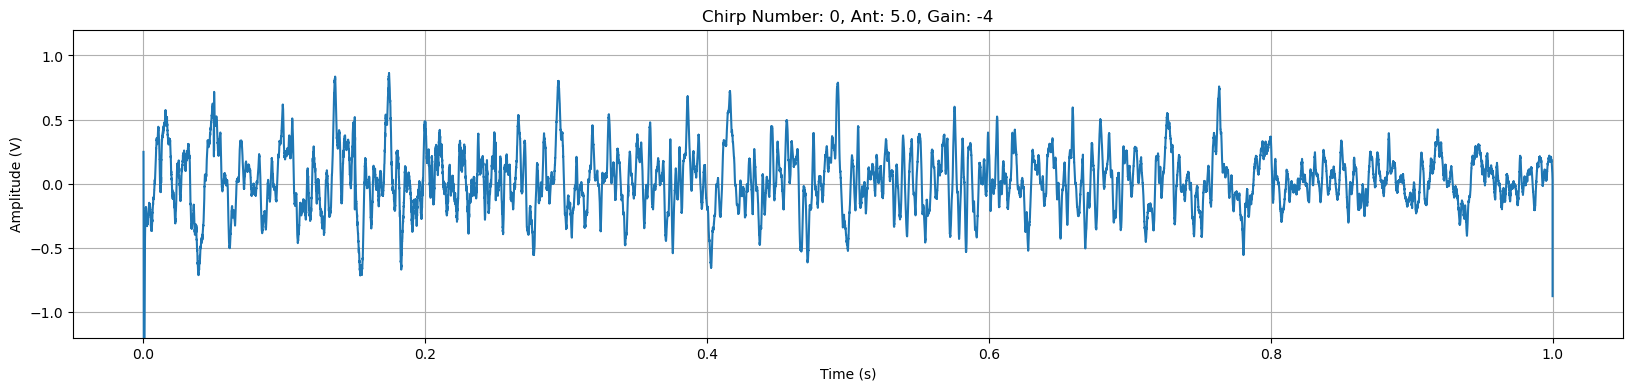

In [164]:
Chirp_1_0_0 = Burst_1_0.ExtractChirp([0]) 
fig, ax = plt.subplots(figsize=(20, 4))

ax.plot(Chirp_1_0_0.t, Chirp_1_0_0.vdat, )
ax.set_xlabel("Time (s)")
ax.set_ylabel("Amplitude (V)")
ax.set_ylim([-1.2,1.2])
ax.grid("on")
ax.set_title(f"Chirp Number: {Chirp_1_0_0.ChirpList[0]}, Ant: {Chirp_1_0_0.Header['Attenuator1_thisChirp'][0]}, Gain: {Chirp_1_0_0.Header['AFGain_thisChirp'][0]}");

## Extract and plot a profile
`ChirpObject`s have a method called FormProfile which does the fft and creates a profile.

In [82]:
Profile_1_0_0 = Chirp_1_0_0.FormProfile()

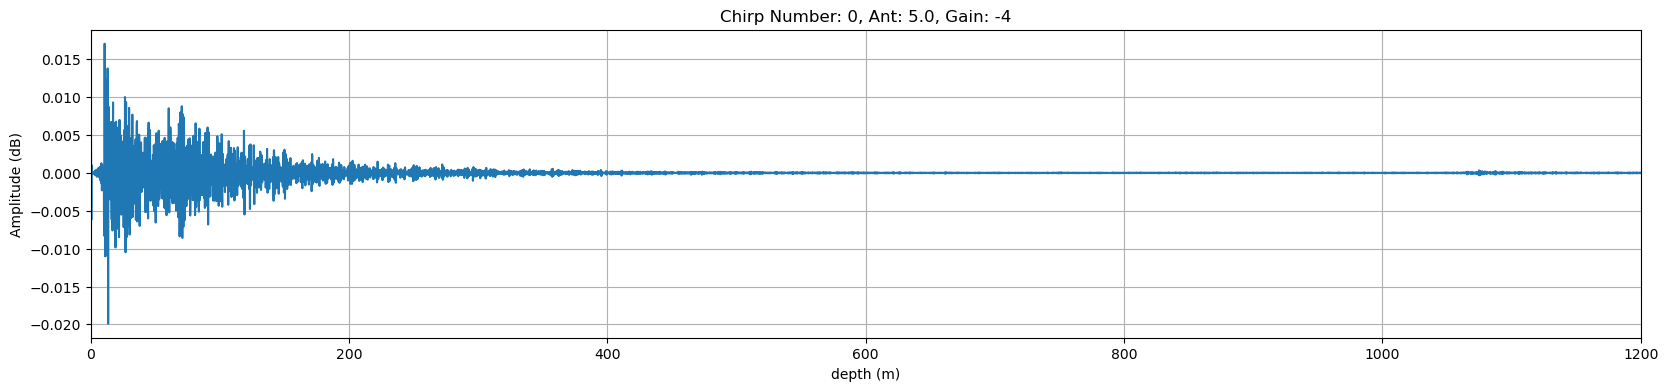

In [83]:
fig, ax = plt.subplots(figsize=(20, 4))

ax.plot(Profile_1_0_0.Range, Profile_1_0_0.Profile )
ax.set_xlabel("depth (m)")
ax.set_ylabel("Amplitude (dB)")
ax.set_xlim([0,1200])
ax.grid("on")
ax.set_title(f"Chirp Number: {Chirp_1_0_0.ChirpList[0]}, Ant: {Chirp_1_0_0.Header['Attenuator1_thisChirp'][0]}, Gain: {Chirp_1_0_0.Header['AFGain_thisChirp'][0]}");

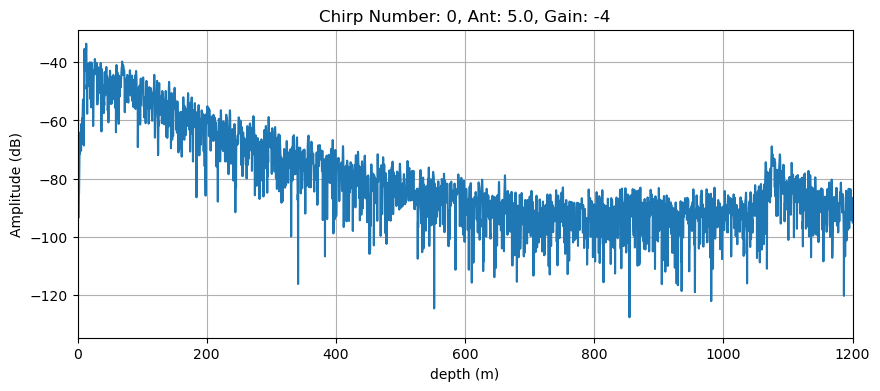

In [75]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(Profile_1_0_0.Range, 20*np.log10(np.abs(Profile_1_0_0.Profile)))
ax.set_xlabel("depth (m)")
ax.set_ylabel("Amplitude (dB)")
ax.set_xlim([0,1200])
ax.grid("on")
ax.set_title(f"Chirp Number: {Chirp_1_0_0.ChirpList[0]}, Ant: {Chirp_1_0_0.Header['Attenuator1_thisChirp'][0]}, Gain: {Chirp_1_0_0.Header['AFGain_thisChirp'][0]}");